In [1]:
import numpy as np
import os
import pickle
from matplotlib import pyplot as plt
%matplotlib inline


import traceback

def p(*expr):
    (filename,line_number,function_name,text)=traceback.extract_stack()[-2]
    begin=text.find('p(')+len('p(')
    end=text.find(')',begin)
    text=[name.strip() for name in text[begin:end].split(',')]
    print(dict(zip(text,expr)))

In [3]:
var_names = ['runId', 'lumiId', 'lumi', 'isSig', 'qPFJetPt', 'qPFJetEta', 'qPFJetPhi', 'qPFJet4CHSPt', 'qPFJet4CHSEta', 'qPFJet4CHSPhi', 'qPFJet8CHSPt', 'qPFJet8CHSEta', 'qPFJet8CHSPhi', 'qPFJetEIPt', 'qPFJetEIEta', 'qPFJetEIPhi', 'qPFJet8CHSSDPt', 'qPFJet8CHSSDEta', 'qPFJet8CHSSDPhi', 'qPFJetTopCHSPt', 'qPFJetTopCHSEta', 'qPFJetTopCHSPhi', 'qPFChMetPt', 'qPFChMetPhi', 'qPFMetPt', 'qPFMetPhi', 'qNVtx', 'qCalJetPt', 'qCalJetEta', 'qCalJetPhi', 'qCalJetEn', 'qCalMETPt', 'qCalMETPhi', 'qCalMETEn', 'qCalMETBEPt', 'qCalMETBEPhi', 'qCalMETBEEn', 'qCalMETBEFOPt', 'qCalMETBEFOPhi', 'qCalMETBEFOEn', 'qCalMETMPt', 'qCalMETMPhi', 'qCalMETMEn', 'qSCEn', 'qSCEta', 'qSCPhi', 'qSCEtaWidth', 'qSCPhiWidth', 'qSCEnhfEM', 'qSCEtahfEM', 'qSCPhihfEM', 'qSCEn5x5', 'qSCEta5x5', 'qSCPhi5x5', 'qSCEtaWidth5x5', 'qSCPhiWidth5x5', 'qCCEn', 'qCCEta', 'qCCPhi', 'qCCEn5x5', 'qCCEta5x5', 'qCCPhi5x5', 'qPhoPt', 'qPhoEta', 'qPhoPhi', 'qPhoEn_', 'qPhoe1x5_', 'qPhoe2x5_', 'qPhoe3x3_', 'qPhoe5x5_', 'qPhomaxenxtal_', 'qPhosigmaeta_', 'qPhosigmaIeta_', 'qPhor1x5_', 'qPhor2x5_', 'qPhor9_', 'qgedPhoPt', 'qgedPhoEta', 'qgedPhoPhi', 'qgedPhoEn_', 'qgedPhoe1x5_', 'qgedPhoe2x5_', 'qgedPhoe3x3_', 'qgedPhoe5x5_', 'qgedPhomaxenxtal_', 'qgedPhosigmaeta_', 'qgedPhosigmaIeta_', 'qgedPhor1x5_', 'qgedPhor2x5_', 'qgedPhor9_', 'qMuPt', 'qMuEta', 'qMuPhi', 'qMuEn_', 'qMuCh_', 'qMuChi2_', 'qMuCosmPt', 'qMuCosmEta', 'qMuCosmPhi', 'qMuCosmEn_', 'qMuCosmCh_', 'qMuCosmChi2_', 'qMuCosmLegPt', 'qMuCosmLegEta', 'qMuCosmLegPhi', 'qMuCosmLegEn_', 'qMuCosmLegCh_', 'qMuCosmLegChi2_', 'qSigmaIEta', 'qSigmaIPhi', 'qr9', 'qHadOEm', 'qdrSumPt', 'qdrSumEt', 'qeSCOP', 'qecEn', 'qUNSigmaIEta', 'qUNSigmaIPhi', 'qUNr9', 'qUNHadOEm', 'qUNdrSumPt', 'qUNdrSumEt', 'qUNeSCOP', 'qUNecEn', 'qEBenergy', 'qEBtime', 'qEBchi2', 'qEBiEta', 'qEBiPhi', 'qEEenergy', 'qEEtime', 'qEEchi2', 'qEEix', 'qEEiy', 'qESenergy', 'qEStime', 'qESix', 'qESiy', 'qHBHEenergy', 'qHBHEtime', 'qHBHEauxe', 'qHBHEieta', 'qHBHEiphi', 'qHFenergy', 'qHFtime', 'qHFieta', 'qHFiphi', 'qPreShEn', 'qPreShEta', 'qPreShPhi', 'qPreShYEn', 'qPreShYEta', 'qPreShYPhi', 'crossSection', 'pathRates', 'pathNames', 'subsystemQuality', 'subsystemNames']
var_names_reduced = ['qPFJetPt', 'qPFJetEta', 'qPFJetPhi', 'qPFJet4CHSPt', 'qPFJet4CHSEta', 'qPFJet4CHSPhi', 'qPFJet8CHSPt', 'qPFJet8CHSEta', 'qPFJet8CHSPhi', 'qPFJetEIPt', 'qPFJetEIEta', 'qPFJetEIPhi', 'qPFJet8CHSSDPt', 'qPFJet8CHSSDEta', 'qPFJet8CHSSDPhi', 'qPFJetTopCHSPt', 'qPFJetTopCHSEta', 'qPFJetTopCHSPhi', 'qPFChMetPt', 'qPFChMetPhi', 'qPFMetPt', 'qPFMetPhi', 'qNVtx', 'qCalJetPt', 'qCalJetEta', 'qCalJetPhi', 'qCalJetEn', 'qCalMETPt', 'qCalMETPhi', 'qCalMETEn', 'qCalMETBEPt', 'qCalMETBEPhi', 'qCalMETBEEn', 'qCalMETBEFOPt', 'qCalMETBEFOPhi', 'qCalMETBEFOEn', 'qCalMETMPt', 'qCalMETMPhi', 'qCalMETMEn', 'qSCEn', 'qSCEta', 'qSCPhi', 'qSCEtaWidth', 'qSCPhiWidth', 'qSCEtahfEM', 'qSCPhihfEM', 'qSCEn5x5', 'qSCEta5x5', 'qSCPhi5x5', 'qSCEtaWidth5x5', 'qSCPhiWidth5x5', 'qCCEn', 'qCCEta', 'qCCPhi', 'qCCEn5x5', 'qCCEta5x5', 'qCCPhi5x5', 'qPhoPt', 'qPhoEta', 'qPhoPhi', 'qPhoEn_', 'qPhoe1x5_', 'qPhoe2x5_', 'qPhoe3x3_', 'qPhoe5x5_', 'qPhomaxenxtal_', 'qPhosigmaeta_', 'qPhosigmaIeta_', 'qPhor1x5_', 'qPhor2x5_', 'qPhor9_', 'qgedPhoPt', 'qgedPhoEta', 'qgedPhoPhi', 'qgedPhoEn_', 'qgedPhoe1x5_', 'qgedPhoe2x5_', 'qgedPhoe3x3_', 'qgedPhoe5x5_', 'qgedPhomaxenxtal_', 'qgedPhosigmaeta_', 'qgedPhosigmaIeta_', 'qgedPhor1x5_', 'qgedPhor2x5_', 'qgedPhor9_', 'qMuPt', 'qMuEta', 'qMuPhi', 'qMuEn_', 'qMuCh_', 'qMuChi2_', 'qMuCosmPt', 'qMuCosmEta', 'qMuCosmPhi', 'qMuCosmEn_', 'qMuCosmCh_', 'qMuCosmChi2_', 'qMuCosmLegPt', 'qMuCosmLegEta', 'qMuCosmLegPhi', 'qMuCosmLegEn_', 'qMuCosmLegCh_', 'qMuCosmLegChi2_', 'qSigmaIEta', 'qSigmaIPhi', 'qr9', 'qHadOEm', 'qdrSumPt', 'qdrSumEt', 'qeSCOP', 'qecEn', 'qUNSigmaIEta', 'qUNSigmaIPhi', 'qUNr9', 'qUNHadOEm', 'qUNdrSumPt', 'qUNdrSumEt', 'qUNeSCOP', 'qUNecEn', 'qEBenergy', 'qEBtime', 'qEBchi2', 'qEBiEta', 'qEBiPhi', 'qEEenergy', 'qEEtime', 'qEEchi2', 'qEEix', 'qEEiy', 'qESenergy', 'qEStime', 'qESix', 'qESiy', 'qHBHEenergy', 'qHBHEtime', 'qHBHEauxe', 'qHBHEieta', 'qHBHEiphi', 'qHFenergy', 'qHFtime', 'qHFieta', 'qHFiphi', 'qPreShEn', 'qPreShEta', 'qPreShPhi', 'qPreShYEn', 'qPreShYEta', 'qPreShYPhi'] #, 'crossSection', 'pathRates', 'pathNames', 'subsystemQuality', 'subsystemNames']

var_names5 = ['runId', 'lumiId', 'lumi', 'isSig', 'qPFJetPt', 'qPFJetEta', 'qPFJetPhi', 'qPFJet0Pt', 'qPFJet1Pt', 'qPFJet2Pt', 'qPFJet3Pt', 'qPFJet4Pt', 'qPFJet5Pt', 'qPFJet0Eta', 'qPFJet1Eta', 'qPFJet2Eta', 'qPFJet3Eta', 'qPFJet4Eta', 'qPFJet5Eta', 'qPFJet0Phi', 'qPFJet1Phi', 'qPFJet2Phi', 'qPFJet3Phi', 'qPFJet4Phi', 'qPFJet5Phi', 'qPFJet4CHS0Pt', 'qPFJet4CHS1Pt', 'qPFJet4CHS2Pt', 'qPFJet4CHS3Pt', 'qPFJet4CHS4Pt', 'qPFJet4CHS5Pt', 'qPFJet4CHS0Eta', 'qPFJet4CHS1Eta', 'qPFJet4CHS2Eta', 'qPFJet4CHS3Eta', 'qPFJet4CHS4Eta', 'qPFJet4CHS5Eta', 'qPFJet4CHS0Phi', 'qPFJet4CHS1Phi', 'qPFJet4CHS2Phi', 'qPFJet4CHS3Phi', 'qPFJet4CHS4Phi', 'qPFJet4CHS5Phi', 'qPFJet8CHS0Pt', 'qPFJet8CHS1Pt', 'qPFJet8CHS2Pt', 'qPFJet8CHS3Pt', 'qPFJet8CHS4Pt', 'qPFJet8CHS5Pt', 'qPFJet8CHS0Eta', 'qPFJet8CHS1Eta', 'qPFJet8CHS2Eta', 'qPFJet8CHS3Eta', 'qPFJet8CHS4Eta', 'qPFJet8CHS5Eta', 'qPFJet8CHS0Phi', 'qPFJet8CHS1Phi', 'qPFJet8CHS2Phi', 'qPFJet8CHS3Phi', 'qPFJet8CHS4Phi', 'qPFJet8CHS5Phi', 'qPFJetEI0Pt', 'qPFJetEI1Pt', 'qPFJetEI2Pt', 'qPFJetEI3Pt', 'qPFJetEI4Pt', 'qPFJetEI5Pt', 'qPFJetEI0Eta', 'qPFJetEI1Eta', 'qPFJetEI2Eta', 'qPFJetEI3Eta', 'qPFJetEI4Eta', 'qPFJetEI5Eta', 'qPFJetEI0Phi', 'qPFJetEI1Phi', 'qPFJetEI2Phi', 'qPFJetEI3Phi', 'qPFJetEI4Phi', 'qPFJetEI5Phi', 'qPFJet8CHSSD0Pt', 'qPFJet8CHSSD1Pt', 'qPFJet8CHSSD2Pt', 'qPFJet8CHSSD3Pt', 'qPFJet8CHSSD4Pt', 'qPFJet8CHSSD5Pt', 'qPFJet8CHSSD0Eta', 'qPFJet8CHSSD1Eta', 'qPFJet8CHSSD2Eta', 'qPFJet8CHSSD3Eta', 'qPFJet8CHSSD4Eta', 'qPFJet8CHSSD5Eta', 'qPFJet8CHSSD0Phi', 'qPFJet8CHSSD1Phi', 'qPFJet8CHSSD2Phi', 'qPFJet8CHSSD3Phi', 'qPFJet8CHSSD4Phi', 'qPFJet8CHSSD5Phi', 'qPFJetTopCHS0Pt', 'qPFJetTopCHS1Pt', 'qPFJetTopCHS2Pt', 'qPFJetTopCHS3Pt', 'qPFJetTopCHS4Pt', 'qPFJetTopCHS5Pt', 'qPFJetTopCHS0Eta', 'qPFJetTopCHS1Eta', 'qPFJetTopCHS2Eta', 'qPFJetTopCHS3Eta', 'qPFJetTopCHS4Eta', 'qPFJetTopCHS5Eta', 'qPFJetTopCHS0Phi', 'qPFJetTopCHS1Phi', 'qPFJetTopCHS2Phi', 'qPFJetTopCHS3Phi', 'qPFJetTopCHS4Phi', 'qPFJetTopCHS5Phi', 'qCalJet0Pt', 'qCalJet1Pt', 'qCalJet2Pt', 'qCalJet3Pt', 'qCalJet4Pt', 'qCalJet5Pt', 'qCalJet0Eta', 'qCalJet1Eta', 'qCalJet2Eta', 'qCalJet3Eta', 'qCalJet4Eta', 'qCalJet5Eta', 'qCalJet0Phi', 'qCalJet1Phi', 'qCalJet2Phi', 'qCalJet3Phi', 'qCalJet4Phi', 'qCalJet5Phi', 'qCalJet0En', 'qCalJet1En', 'qCalJet2En', 'qCalJet3En', 'qCalJet4En', 'qCalJet5En', 'qPho0Pt', 'qPho1Pt', 'qPho2Pt', 'qPho3Pt', 'qPho4Pt', 'qPho5Pt', 'qPho0Eta', 'qPho1Eta', 'qPho2Eta', 'qPho3Eta', 'qPho4Eta', 'qPho5Eta', 'qPho0Phi', 'qPho1Phi', 'qPho2Phi', 'qPho3Phi', 'qPho4Phi', 'qPho5Phi', 'qPho0En', 'qPho1En', 'qPho2En', 'qPho3En', 'qPho4En', 'qPho5En', 'qgedPho0Pt', 'qgedPho1Pt', 'qgedPho2Pt', 'qgedPho3Pt', 'qgedPho4Pt', 'qgedPho5Pt', 'qgedPho0Eta', 'qgedPho1Eta', 'qgedPho2Eta', 'qgedPho3Eta', 'qgedPho4Eta', 'qgedPho5Eta', 'qgedPho0Phi', 'qgedPho1Phi', 'qgedPho2Phi', 'qgedPho3Phi', 'qgedPho4Phi', 'qgedPho5Phi', 'qgedPho0En', 'qgedPho1En', 'qgedPho2En', 'qgedPho3En', 'qgedPho4En', 'qgedPho5En', 'qMu0Pt', 'qMu1Pt', 'qMu2Pt', 'qMu3Pt', 'qMu4Pt', 'qMu5Pt', 'qMu0Eta', 'qMu1Eta', 'qMu2Eta', 'qMu3Eta', 'qMu4Eta', 'qMu5Eta', 'qMu0Phi', 'qMu1Phi', 'qMu2Phi', 'qMu3Phi', 'qMu4Phi', 'qMu5Phi', 'qMu0En', 'qMu1En', 'qMu2En', 'qMu3En', 'qMu4En', 'qMu5En', 'qMuCosm0Pt', 'qMuCosm1Pt', 'qMuCosm2Pt', 'qMuCosm3Pt', 'qMuCosm4Pt', 'qMuCosm5Pt', 'qMuCosm0Eta', 'qMuCosm1Eta', 'qMuCosm2Eta', 'qMuCosm3Eta', 'qMuCosm4Eta', 'qMuCosm5Eta', 'qMuCosm0Phi', 'qMuCosm1Phi', 'qMuCosm2Phi', 'qMuCosm3Phi', 'qMuCosm4Phi', 'qMuCosm5Phi', 'qMuCosm0En', 'qMuCosm1En', 'qMuCosm2En', 'qMuCosm3En', 'qMuCosm4En', 'qMuCosm5En', 'qMuCosmLeg0Pt', 'qMuCosmLeg1Pt', 'qMuCosmLeg2Pt', 'qMuCosmLeg3Pt', 'qMuCosmLeg4Pt', 'qMuCosmLeg5Pt', 'qMuCosmLeg0Eta', 'qMuCosmLeg1Eta', 'qMuCosmLeg2Eta', 'qMuCosmLeg3Eta', 'qMuCosmLeg4Eta', 'qMuCosmLeg5Eta', 'qMuCosmLeg0Phi', 'qMuCosmLeg1Phi', 'qMuCosmLeg2Phi', 'qMuCosmLeg3Phi', 'qMuCosmLeg4Phi', 'qMuCosmLeg5Phi', 'qMuCosmLeg0En', 'qMuCosmLeg1En', 'qMuCosmLeg2En', 'qMuCosmLeg3En', 'qMuCosmLeg4En', 'qMuCosmLeg5En', 'qPFJet4CHSPt', 'qPFJet4CHSEta', 'qPFJet4CHSPhi', 'qPFJet8CHSPt', 'qPFJet8CHSEta', 'qPFJet8CHSPhi', 'qPFJetEIPt', 'qPFJetEIEta', 'qPFJetEIPhi', 'qPFJet8CHSSDPt', 'qPFJet8CHSSDEta', 'qPFJet8CHSSDPhi', 'qPFJetTopCHSPt', 'qPFJetTopCHSEta', 'qPFJetTopCHSPhi', 'qPFChMetPt', 'qPFChMetPhi', 'qPFMetPt', 'qPFMetPhi', 'qNVtx', 'qCalJetPt', 'qCalJetEta', 'qCalJetPhi', 'qCalJetEn', 'qCalMETPt', 'qCalMETPhi', 'qCalMETEn', 'qCalMETBEPt', 'qCalMETBEPhi', 'qCalMETBEEn', 'qCalMETBEFOPt', 'qCalMETBEFOPhi', 'qCalMETBEFOEn', 'qCalMETMPt', 'qCalMETMPhi', 'qCalMETMEn', 'qSCEn', 'qSCEta', 'qSCPhi', 'qSCEtaWidth', 'qSCPhiWidth', 'qSCEnhfEM', 'qSCEtahfEM', 'qSCPhihfEM', 'qSCEn5x5', 'qSCEta5x5', 'qSCPhi5x5', 'qSCEtaWidth5x5', 'qSCPhiWidth5x5', 'qCCEn', 'qCCEta', 'qCCPhi', 'qCCEn5x5', 'qCCEta5x5', 'qCCPhi5x5', 'qPhoPt', 'qPhoEta', 'qPhoPhi', 'qPhoEn_', 'qPhoe1x5_', 'qPhoe2x5_', 'qPhoe3x3_', 'qPhoe5x5_', 'qPhomaxenxtal_', 'qPhosigmaeta_', 'qPhosigmaIeta_', 'qPhor1x5_', 'qPhor2x5_', 'qPhor9_', 'qgedPhoPt', 'qgedPhoEta', 'qgedPhoPhi', 'qgedPhoEn_', 'qgedPhoe1x5_', 'qgedPhoe2x5_', 'qgedPhoe3x3_', 'qgedPhoe5x5_', 'qgedPhomaxenxtal_', 'qgedPhosigmaeta_', 'qgedPhosigmaIeta_', 'qgedPhor1x5_', 'qgedPhor2x5_', 'qgedPhor9_', 'qMuPt', 'qMuEta', 'qMuPhi', 'qMuEn_', 'qMuCh_', 'qMuChi2_', 'qMuCosmPt', 'qMuCosmEta', 'qMuCosmPhi', 'qMuCosmEn_', 'qMuCosmCh_', 'qMuCosmChi2_', 'qMuCosmLegPt', 'qMuCosmLegEta', 'qMuCosmLegPhi', 'qMuCosmLegEn_', 'qMuCosmLegCh_', 'qMuCosmLegChi2_', 'qSigmaIEta', 'qSigmaIPhi', 'qr9', 'qHadOEm', 'qdrSumPt', 'qdrSumEt', 'qeSCOP', 'qecEn', 'qUNSigmaIEta', 'qUNSigmaIPhi', 'qUNr9', 'qUNHadOEm', 'qUNdrSumPt', 'qUNdrSumEt', 'qUNeSCOP', 'qUNecEn', 'qEBenergy', 'qEBtime', 'qEBchi2', 'qEBiEta', 'qEBiPhi', 'qEEenergy', 'qEEtime', 'qEEchi2', 'qEEix', 'qEEiy', 'qESenergy', 'qEStime', 'qESix', 'qESiy', 'qHBHEenergy', 'qHBHEtime', 'qHBHEauxe', 'qHBHEieta', 'qHBHEiphi', 'qHFenergy', 'qHFtime', 'qHFieta', 'qHFiphi', 'qPreShEn', 'qPreShEta', 'qPreShPhi', 'qPreShYEn', 'qPreShYEta', 'qPreShYPhi', 'crossSection', 'pathRates', 'pathNames', 'subsystemQuality', 'subsystemNames']
var_names_reduced5 = ['qPFJetPt', 'qPFJetEta', 'qPFJetPhi', 'qPFJet0Pt', 'qPFJet1Pt', 'qPFJet2Pt', 'qPFJet3Pt', 'qPFJet4Pt', 'qPFJet5Pt', 'qPFJet0Eta', 'qPFJet1Eta', 'qPFJet2Eta', 'qPFJet3Eta', 'qPFJet4Eta', 'qPFJet5Eta', 'qPFJet0Phi', 'qPFJet1Phi', 'qPFJet2Phi', 'qPFJet3Phi', 'qPFJet4Phi', 'qPFJet5Phi', 'qPFJet4CHS0Pt', 'qPFJet4CHS1Pt', 'qPFJet4CHS2Pt', 'qPFJet4CHS3Pt', 'qPFJet4CHS4Pt', 'qPFJet4CHS5Pt', 'qPFJet4CHS0Eta', 'qPFJet4CHS1Eta', 'qPFJet4CHS2Eta', 'qPFJet4CHS3Eta', 'qPFJet4CHS4Eta', 'qPFJet4CHS5Eta', 'qPFJet4CHS0Phi', 'qPFJet4CHS1Phi', 'qPFJet4CHS2Phi', 'qPFJet4CHS3Phi', 'qPFJet4CHS4Phi', 'qPFJet4CHS5Phi', 'qPFJet8CHS0Pt', 'qPFJet8CHS1Pt', 'qPFJet8CHS2Pt', 'qPFJet8CHS3Pt', 'qPFJet8CHS4Pt', 'qPFJet8CHS5Pt', 'qPFJet8CHS0Eta', 'qPFJet8CHS1Eta', 'qPFJet8CHS2Eta', 'qPFJet8CHS3Eta', 'qPFJet8CHS4Eta', 'qPFJet8CHS5Eta', 'qPFJet8CHS0Phi', 'qPFJet8CHS1Phi', 'qPFJet8CHS2Phi', 'qPFJet8CHS3Phi', 'qPFJet8CHS4Phi', 'qPFJet8CHS5Phi', 'qPFJetEI0Pt', 'qPFJetEI1Pt', 'qPFJetEI2Pt', 'qPFJetEI3Pt', 'qPFJetEI4Pt', 'qPFJetEI5Pt', 'qPFJetEI0Eta', 'qPFJetEI1Eta', 'qPFJetEI2Eta', 'qPFJetEI3Eta', 'qPFJetEI4Eta', 'qPFJetEI5Eta', 'qPFJetEI0Phi', 'qPFJetEI1Phi', 'qPFJetEI2Phi', 'qPFJetEI3Phi', 'qPFJetEI4Phi', 'qPFJetEI5Phi', 'qPFJet8CHSSD0Pt', 'qPFJet8CHSSD1Pt', 'qPFJet8CHSSD2Pt', 'qPFJet8CHSSD3Pt', 'qPFJet8CHSSD4Pt', 'qPFJet8CHSSD5Pt', 'qPFJet8CHSSD0Eta', 'qPFJet8CHSSD1Eta', 'qPFJet8CHSSD2Eta', 'qPFJet8CHSSD3Eta', 'qPFJet8CHSSD4Eta', 'qPFJet8CHSSD5Eta', 'qPFJet8CHSSD0Phi', 'qPFJet8CHSSD1Phi', 'qPFJet8CHSSD2Phi', 'qPFJet8CHSSD3Phi', 'qPFJet8CHSSD4Phi', 'qPFJet8CHSSD5Phi', 'qPFJetTopCHS0Pt', 'qPFJetTopCHS1Pt', 'qPFJetTopCHS2Pt', 'qPFJetTopCHS3Pt', 'qPFJetTopCHS4Pt', 'qPFJetTopCHS5Pt', 'qPFJetTopCHS0Eta', 'qPFJetTopCHS1Eta', 'qPFJetTopCHS2Eta', 'qPFJetTopCHS3Eta', 'qPFJetTopCHS4Eta', 'qPFJetTopCHS5Eta', 'qPFJetTopCHS0Phi', 'qPFJetTopCHS1Phi', 'qPFJetTopCHS2Phi', 'qPFJetTopCHS3Phi', 'qPFJetTopCHS4Phi', 'qPFJetTopCHS5Phi', 'qCalJet0Pt', 'qCalJet1Pt', 'qCalJet2Pt', 'qCalJet3Pt', 'qCalJet4Pt', 'qCalJet5Pt', 'qCalJet0Eta', 'qCalJet1Eta', 'qCalJet2Eta', 'qCalJet3Eta', 'qCalJet4Eta', 'qCalJet5Eta', 'qCalJet0Phi', 'qCalJet1Phi', 'qCalJet2Phi', 'qCalJet3Phi', 'qCalJet4Phi', 'qCalJet5Phi', 'qCalJet0En', 'qCalJet1En', 'qCalJet2En', 'qCalJet3En', 'qCalJet4En', 'qCalJet5En', 'qPho0Pt', 'qPho1Pt', 'qPho2Pt', 'qPho3Pt', 'qPho4Pt', 'qPho5Pt', 'qPho0Eta', 'qPho1Eta', 'qPho2Eta', 'qPho3Eta', 'qPho4Eta', 'qPho5Eta', 'qPho0Phi', 'qPho1Phi', 'qPho2Phi', 'qPho3Phi', 'qPho4Phi', 'qPho5Phi', 'qPho0En', 'qPho1En', 'qPho2En', 'qPho3En', 'qPho4En', 'qPho5En', 'qgedPho0Pt', 'qgedPho1Pt', 'qgedPho2Pt', 'qgedPho3Pt', 'qgedPho4Pt', 'qgedPho5Pt', 'qgedPho0Eta', 'qgedPho1Eta', 'qgedPho2Eta', 'qgedPho3Eta', 'qgedPho4Eta', 'qgedPho5Eta', 'qgedPho0Phi', 'qgedPho1Phi', 'qgedPho2Phi', 'qgedPho3Phi', 'qgedPho4Phi', 'qgedPho5Phi', 'qgedPho0En', 'qgedPho1En', 'qgedPho2En', 'qgedPho3En', 'qgedPho4En', 'qgedPho5En', 'qMu0Pt', 'qMu1Pt', 'qMu2Pt', 'qMu3Pt', 'qMu4Pt', 'qMu5Pt', 'qMu0Eta', 'qMu1Eta', 'qMu2Eta', 'qMu3Eta', 'qMu4Eta', 'qMu5Eta', 'qMu0Phi', 'qMu1Phi', 'qMu2Phi', 'qMu3Phi', 'qMu4Phi', 'qMu5Phi', 'qMu0En', 'qMu1En', 'qMu2En', 'qMu3En', 'qMu4En', 'qMu5En', 'qMuCosm0Pt', 'qMuCosm1Pt', 'qMuCosm2Pt', 'qMuCosm3Pt', 'qMuCosm4Pt', 'qMuCosm5Pt', 'qMuCosm0Eta', 'qMuCosm1Eta', 'qMuCosm2Eta', 'qMuCosm3Eta', 'qMuCosm4Eta', 'qMuCosm5Eta', 'qMuCosm0Phi', 'qMuCosm1Phi', 'qMuCosm2Phi', 'qMuCosm3Phi', 'qMuCosm4Phi', 'qMuCosm5Phi', 'qMuCosm0En', 'qMuCosm1En', 'qMuCosm2En', 'qMuCosm3En', 'qMuCosm4En', 'qMuCosm5En', 'qMuCosmLeg0Pt', 'qMuCosmLeg1Pt', 'qMuCosmLeg2Pt', 'qMuCosmLeg3Pt', 'qMuCosmLeg4Pt', 'qMuCosmLeg5Pt', 'qMuCosmLeg0Eta', 'qMuCosmLeg1Eta', 'qMuCosmLeg2Eta', 'qMuCosmLeg3Eta', 'qMuCosmLeg4Eta', 'qMuCosmLeg5Eta', 'qMuCosmLeg0Phi', 'qMuCosmLeg1Phi', 'qMuCosmLeg2Phi', 'qMuCosmLeg3Phi', 'qMuCosmLeg4Phi', 'qMuCosmLeg5Phi', 'qMuCosmLeg0En', 'qMuCosmLeg1En', 'qMuCosmLeg2En', 'qMuCosmLeg3En', 'qMuCosmLeg4En', 'qMuCosmLeg5En', 'qPFJet4CHSPt', 'qPFJet4CHSEta', 'qPFJet4CHSPhi', 'qPFJet8CHSPt', 'qPFJet8CHSEta', 'qPFJet8CHSPhi', 'qPFJetEIPt', 'qPFJetEIEta', 'qPFJetEIPhi', 'qPFJet8CHSSDPt', 'qPFJet8CHSSDEta', 'qPFJet8CHSSDPhi', 'qPFJetTopCHSPt', 'qPFJetTopCHSEta', 'qPFJetTopCHSPhi', 'qPFChMetPt', 'qPFChMetPhi', 'qPFMetPt', 'qPFMetPhi', 'qNVtx', 'qCalJetPt', 'qCalJetEta', 'qCalJetPhi', 'qCalJetEn', 'qCalMETPt', 'qCalMETPhi', 'qCalMETEn', 'qCalMETBEPt', 'qCalMETBEPhi', 'qCalMETBEEn', 'qCalMETBEFOPt', 'qCalMETBEFOPhi', 'qCalMETBEFOEn', 'qCalMETMPt', 'qCalMETMPhi', 'qCalMETMEn', 'qSCEn', 'qSCEta', 'qSCPhi', 'qSCEtaWidth', 'qSCPhiWidth', 'qSCEtahfEM', 'qSCPhihfEM', 'qSCEn5x5', 'qSCEta5x5', 'qSCPhi5x5', 'qSCEtaWidth5x5', 'qSCPhiWidth5x5', 'qCCEn', 'qCCEta', 'qCCPhi', 'qCCEn5x5', 'qCCEta5x5', 'qCCPhi5x5', 'qPhoPt', 'qPhoEta', 'qPhoPhi', 'qPhoEn_', 'qPhoe1x5_', 'qPhoe2x5_', 'qPhoe3x3_', 'qPhoe5x5_', 'qPhomaxenxtal_', 'qPhosigmaeta_', 'qPhosigmaIeta_', 'qPhor1x5_', 'qPhor2x5_', 'qPhor9_', 'qgedPhoPt', 'qgedPhoEta', 'qgedPhoPhi', 'qgedPhoEn_', 'qgedPhoe1x5_', 'qgedPhoe2x5_', 'qgedPhoe3x3_', 'qgedPhoe5x5_', 'qgedPhomaxenxtal_', 'qgedPhosigmaeta_', 'qgedPhosigmaIeta_', 'qgedPhor1x5_', 'qgedPhor2x5_', 'qgedPhor9_', 'qMuPt', 'qMuEta', 'qMuPhi', 'qMuEn_', 'qMuCh_', 'qMuChi2_', 'qMuCosmPt', 'qMuCosmEta', 'qMuCosmPhi', 'qMuCosmEn_', 'qMuCosmCh_', 'qMuCosmChi2_', 'qMuCosmLegPt', 'qMuCosmLegEta', 'qMuCosmLegPhi', 'qMuCosmLegEn_', 'qMuCosmLegCh_', 'qMuCosmLegChi2_', 'qSigmaIEta', 'qSigmaIPhi', 'qr9', 'qHadOEm', 'qdrSumPt', 'qdrSumEt', 'qeSCOP', 'qecEn', 'qUNSigmaIEta', 'qUNSigmaIPhi', 'qUNr9', 'qUNHadOEm', 'qUNdrSumPt', 'qUNdrSumEt', 'qUNeSCOP', 'qUNecEn', 'qEBenergy', 'qEBtime', 'qEBchi2', 'qEBiEta', 'qEBiPhi', 'qEEenergy', 'qEEtime', 'qEEchi2', 'qEEix', 'qEEiy', 'qESenergy', 'qEStime', 'qESix', 'qESiy', 'qHBHEenergy', 'qHBHEtime', 'qHBHEauxe', 'qHBHEieta', 'qHBHEiphi', 'qHFenergy', 'qHFtime', 'qHFieta', 'qHFiphi', 'qPreShEn', 'qPreShEta', 'qPreShPhi', 'qPreShYEn', 'qPreShYEta', 'qPreShYPhi']
print(set(var_names_reduced5) == set(var_names5) - (set(var_names)-set(var_names_reduced)))


print(len(var_names5))
print(len(var_names_reduced5))
print((set(var_names)-set(var_names_reduced)))
del var_names
del var_names_reduced

True
410
400
{'qSCEnhfEM', 'lumi', 'runId', 'crossSection', 'subsystemQuality', 'isSig', 'pathNames', 'lumiId', 'subsystemNames', 'pathRates'}


In [3]:
def get_npy_paths_all(path):
    if os.path.isdir(path):
        npy_paths = []
        for e in os.listdir(path):
            npy_paths += get_npy_paths_all(path+'/'+e)
        return npy_paths
#         return [ get_npy_paths_all(path+'/'+e) for e in os.listdir(path) ] 
    else:
        if ".npy" in path:
            return [path]

def get_npy_paths(root_dir, chosen_vars=None):
    npy_paths = []
    if chosen_vars is None:
        chosen_vars = os.listdir(root_dir)
    print(chosen_vars)
    
    for chosen_var in chosen_vars:
        npy_paths += get_npy_paths_all(root_dir+'/'+chosen_var)
    
    return npy_paths

def array_generator(paths):
    for e in paths:
        yield np.load(e, encoding='latin1')
        
def get_filtered_events(array, var_list, verbose=False):
    n_vars = len(var_list)
    if verbose:
        print("Number of variables received: ", n_vars)
    n_good_events_per_var = np.empty(n_vars)
    mask = array['lumi'] != 0  #np.bool_(np.ones(len(array)))
    for i in range(n_vars):
        var_mask = np.array(list(map(lambda x: len(x)==7, array[var_list[i]]))) # accept only events which has length 7
        n_good_events_per_var[i] = np.sum(var_mask)
        mask = np.logical_and(mask,var_mask)
        
    if verbose:
        tuples_of_n_events = list(zip(var_list, n_good_events_per_var))
        tuples_of_n_events_sorted = sorted(tuples_of_n_events, key=lambda tup: tup[1])
        print("Number of good events for each variable: ", tuples_of_n_events_sorted)
    
    goodEvents = array[mask]
#     ind = np.lexsort((goodEvents['lumiId'],goodEvents['runId']))
#     goodEvents = goodEvents[ind]  # now sorted, is it necessary?
    
    n_good_events = len(goodEvents)
    matrix = np.empty([n_good_events,n_vars*7+2])
    
    for j in range(n_good_events):
        for i in range(n_vars):
            matrix[j,i*7:(i+1)*7] = goodEvents[var_list[i]][j]
        matrix[j,-2] = goodEvents['crossSection'][j][0]
        matrix[j,-1] = goodEvents['pathRates'][j][0]
    
    target = goodEvents['isSig'] 

    sigInd = np.where(target==1)
    backInd = np.where(target==0)
    sigVals = matrix[sigInd]
    backVals = matrix[backInd]
    
    if verbose:
        print("Out of %s events, are %s valid. %s have signal and %s are background." % 
              (len(array), n_good_events, sigVals.shape[0], backVals.shape[0]))
    
    return sigVals, backVals
    

paths = get_npy_paths('/home/my_stuff')
arr_gen = array_generator(paths)
print(len(paths))



['HighMultiplicityEOF', 'SingleElectron']
1593


In [ ]:
%%time
arr_gen = array_generator(paths)
n_sig = 0
n_back = 0
break_after = 10000
minimum = np.zeros(len(var_names_reduced5)*7+2)+np.inf
maximum = np.zeros(len(var_names_reduced5)*7+2)-np.inf
for (i,arr) in enumerate(arr_gen):
    if i%30==0:
        print(str(i)+' ', end="")
    if i>break_after:
        break
        
    sigVals, backVals = get_filtered_events(arr, var_names_reduced5)
    n_sig += len(sigVals)
    n_back += len(backVals)
    
    vals = np.concatenate((sigVals, backVals))
    if len(vals)>0:
        minimum = np.min([np.min(vals, axis=0), minimum], axis=0)
        maximum = np.max([np.max(vals, axis=0), maximum], axis=0)
        
    if minimum[0]>0:
        print(i, minimum[0])
    
# # f = open('min_max.pkl', 'wb')
# pickle.dump([minimum, maximum], f)
# f.close()
    
print('\n', n_sig, n_back, i)

In [9]:
sigVals.dtype

dtype('float64')

In [4]:
labels = []
for i in range(len(var_names_reduced5)):
        for suffix in ['Mean','RMS','Q1','Q2','Q3','Q4','Q5']:
            labels.append(var_names_reduced5[i]+'_'+suffix)

In [116]:
zeros_only = []
for i in range(len(maximum)):
    print(labels[i], '\t', minimum[i], maximum[i])
    if minimum[i]==0.0 and maximum[i]==0.0:
        zeros_only.append(labels[i])
        
print(zeros_only)
print(len(zeros_only))

qCalJet3Eta_Mean 	 -1.65540623665 0.586936235428
qCalJet3Eta_RMS 	 0.289228767157 3.58198523521
qCalJet3Eta_Q1 	 -5.06639957428 -3.55809092522
qCalJet3Eta_Q2 	 -3.77326750755 0.0
qCalJet3Eta_Q3 	 -3.10453891754 2.27112841606
qCalJet3Eta_Q4 	 0.0 3.71447062492
qCalJet3Eta_Q5 	 2.82629728317 5.06272125244
qgedPhoe2x5__Mean 	 4.83434152603 114.269592285
qgedPhoe2x5__RMS 	 8.89104557037 185.563369751
qgedPhoe2x5__Q1 	 0.230000004172 0.489641606808
qgedPhoe2x5__Q2 	 1.00906968117 23.4305152893
qgedPhoe2x5__Q3 	 2.05959653854 63.6969070435
qgedPhoe2x5__Q4 	 4.15999412537 133.293411255
qgedPhoe2x5__Q5 	 106.464118958 6473.20996094
qPFJet8CHS4Eta_Mean 	 -0.501033127308 0.277123391628
qPFJet8CHS4Eta_RMS 	 0.0 3.10144591331
qPFJet8CHS4Eta_Q1 	 -4.97818565369 0.0
qPFJet8CHS4Eta_Q2 	 -3.46033906937 0.0
qPFJet8CHS4Eta_Q3 	 0.0 0.0
qPFJet8CHS4Eta_Q4 	 0.0 3.48071837425
qPFJet8CHS4Eta_Q5 	 0.0 5.08212471008
qgedPho3Phi_Mean 	 -0.172351121902 0.173876658082
qgedPho3Phi_RMS 	 0.0191214922816 1.11652672

In [36]:
%%time
# f = open('min_max.pkl', 'rb')
# [minimum, maximum] = pickle.load(f)
# f.close()
n_bins = 100
n_vars = len(minimum)
hist_sig = np.zeros([n_bins, n_vars])
hist_back = np.zeros([n_bins, n_vars])

    
arr_gen = array_generator(paths)
for (i,arr) in enumerate(arr_gen):
    if i%30==0:
        print(str(i)+' ', end="")
    if i>break_after:
        break

    sigVals, backVals = get_filtered_events(arr, var_names_reduced5)

    for j in range(n_vars):
        hist_sig[:,j] += np.histogram(sigVals[:,j], bins=n_bins, range=(minimum[j],maximum[j]), normed=False)[0]
        hist_back[:,j] += np.histogram(backVals[:,j], bins=n_bins, range=(minimum[j],maximum[j]), normed=False)[0]

bin_ranges = np.zeros([n_bins+1, n_vars])
for j in range(n_vars):
    bin_ranges[:,j] = np.histogram(sigVals[:,j], bins=n_bins, range=(minimum[j],maximum[j]), normed=False)[1]
    
# bins_sig = np.zeros([n_bins+1, n_vars])
# bins_back = np.zeros([n_bins+1, n_vars])
# for j in range(n_vars):
#     bins_sig[:,j] = np.histogram(sigVals[:,j], bins=n_bins, range=(minimum[j],maximum[j]), normed=False)[1]
#     bins_back[:,j] = np.histogram(backVals[:,j], bins=n_bins, range=(minimum[j],maximum[j]), normed=False)[1]


0 30 60 90 120 150 180 210 240 270 300 330 360 390 420 450 480 510 540 570 600 630 660 690 720 750 780 810 840 870 900 930 960 990 1020 1050 1080 1110 1140 1170 1200 1230 1260 1290 1320 1350 1380 1410 1440 1470 1500 1530 1560 1590 CPU times: user 16min 17s, sys: 7.53 s, total: 16min 24s
Wall time: 16min 21s


In [32]:
f = open('all_data_scripts/histograms.pkl', 'rb')
[hist_sig, hist_back,bin_ranges] = pickle.load(f)
f.close()

f = open('all_data_scripts/min_max2.pkl', 'rb')
[minimum, maximum] = pickle.load(f)
f.close()


In [13]:
f = open('all_data_scripts/hists_JetHT.pkl', 'rb')
[hist_sig, hist_back, minimum, maximum] = pickle.load(f)
f.close()



In [ ]:
n_bins = 100
bin_ranges = np.zeros([n_bins+1, len(labels)])
for j in range(len(labels)):
    bin_ranges[:,j] = np.histogram([2,3,4], bins=n_bins, range=(minimum[j],maximum[j]), normed=False)[1]
    
print(bin_ranges[:,1000])

In [24]:
np.histogram([0,0,1,3], bins=3, range=(0,3))

(array([2, 1, 1]), array([ 0.,  1.,  2.,  3.]))

In [17]:
def normalize(h):
    return h / np.sum(h)

def bhattacharyya(h1, h2):
  '''Calculates the Byattacharyya distance of two histograms.'''

  return 1 - np.sum(np.sqrt(np.multiply(normalize(h1), normalize(h2))))


In [18]:
def plot_variables(hist_sig, hist_back, bin_ranges, var_list, save_figs_path=None, var_range_to_plot=None, normed=True):
    if var_range_to_plot is None:
        var_range_to_plot = range(len(var_list))
    
    labels = []
    for i in range(len(var_list)):
            for suffix in ['Mean','RMS','Q1','Q2','Q3','Q4','Q5']:
                labels.append(var_list[i]+'_'+suffix)
                
    n_sig = np.sum(hist_sig[:,0])
    n_back = np.sum(hist_back[:,0])
    
    if normed:
        hist_sig = np.divide(hist_sig, n_sig) 
        hist_back = np.divide(hist_back, n_back) 
    
    for var_id in var_range_to_plot: 
        print(var_list[var_id])
        fig = plt.figure(figsize=(15, 7))
        for i in range(7):
            plt.subplot(2, 4, i + 1)    
            index = var_id*7+i
            width = (bin_ranges[1,index]-bin_ranges[0,index])
            bin_ranges_middles = bin_ranges[:,index] + width/2.0
            plt.bar( bin_ranges_middles[:-1],hist_sig[:,index], width=width, facecolor='blue', alpha=0.5, label="normal")
            plt.bar( bin_ranges_middles[:-1],hist_back[:,index], width=width, facecolor='red', alpha=0.5, label="background")

            bhat = bhattacharyya(hist_sig[:,index], hist_back[:,index])
            plt.plot([],[], '.', label="Bhatta {:.4f}".format(bhat))

            plt.legend(loc="upper right")
            plt.title(labels[index],fontsize=16)

        ax = plt.subplot(2,4,8)
        plt.plot([0,1],[0,1],'.')
    #     plt.title('notes',fontsize=16)
        plt.text(0, 0.9, 'number of lumi-section', fontsize=15)
        plt.text(0, 0.7, 'background '+str(int(n_back)), fontsize=15)
        plt.text(0, 0.5, 'normal '+str(int(n_sig)), fontsize=15)
        plt.setp(ax.get_xticklabels(),visible=False)
        plt.setp(ax.get_yticklabels(),visible=False)

        plt.tight_layout()
        # setting the global title and pushing the subplots down accordingly 
        st = fig.suptitle(var_list[var_id], fontsize=25)
        st.set_y(0.95)
        fig.subplots_adjust(top=0.85)
        
        if save_figs_path is not None:
            plt.savefig(save_figs_path+'/'+var_list[var_id]+'.png', dpi=fig.dpi)
    print('done plot_variables')

qPFJet8CHSPhi
qMu5Eta
qMuEn_
qgedPho5Phi
qUNdrSumEt
qHBHEieta
qgedPho0Eta
qPFJet8CHSSDPhi
qgedPho5Phi
qMu3Pt
qCalJet1Pt
qgedPhoe2x5_
qMu5En
qPFJet8CHSSD3Eta
qMu5Eta
done plot_variables


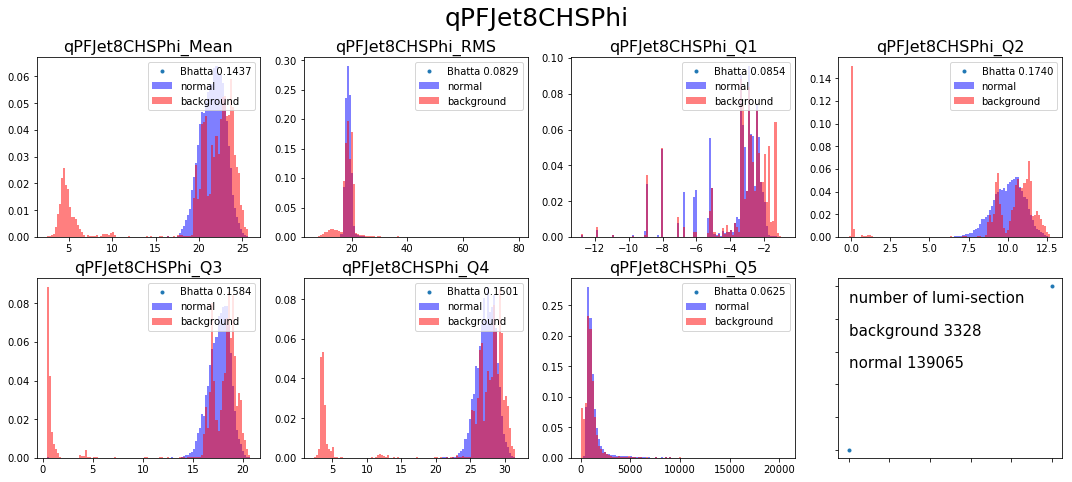

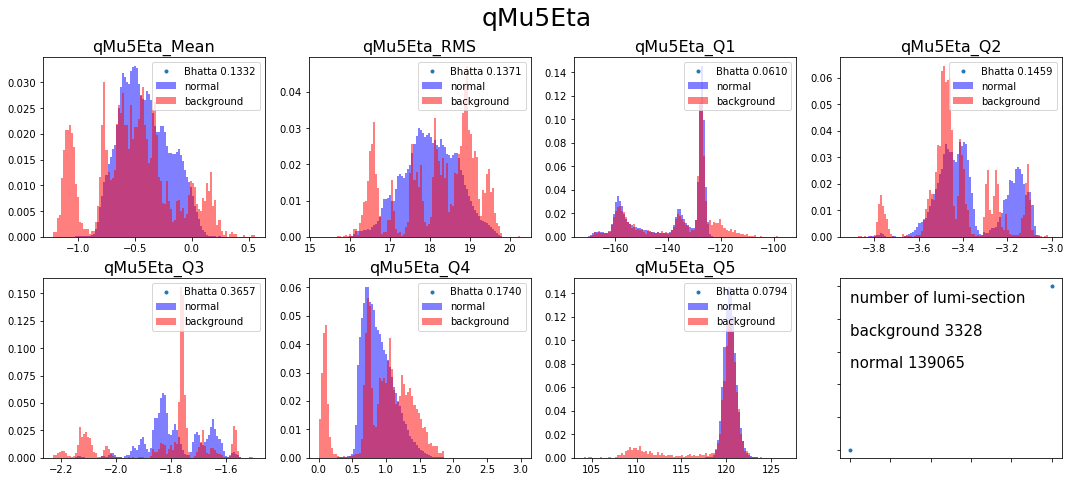

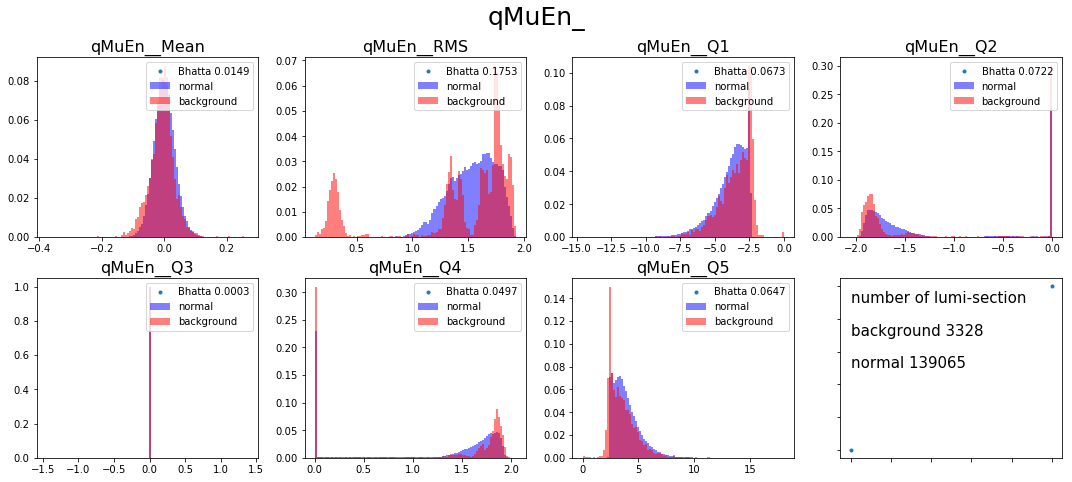

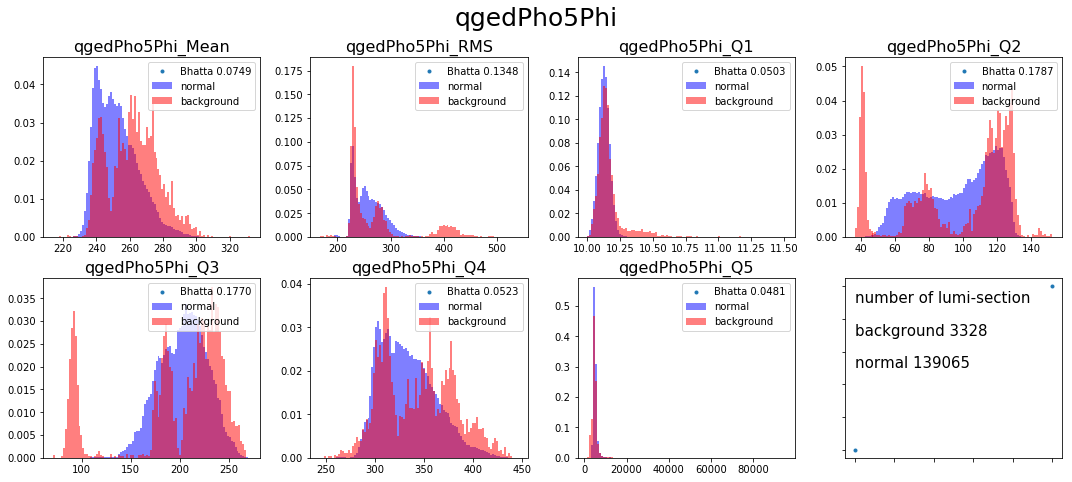

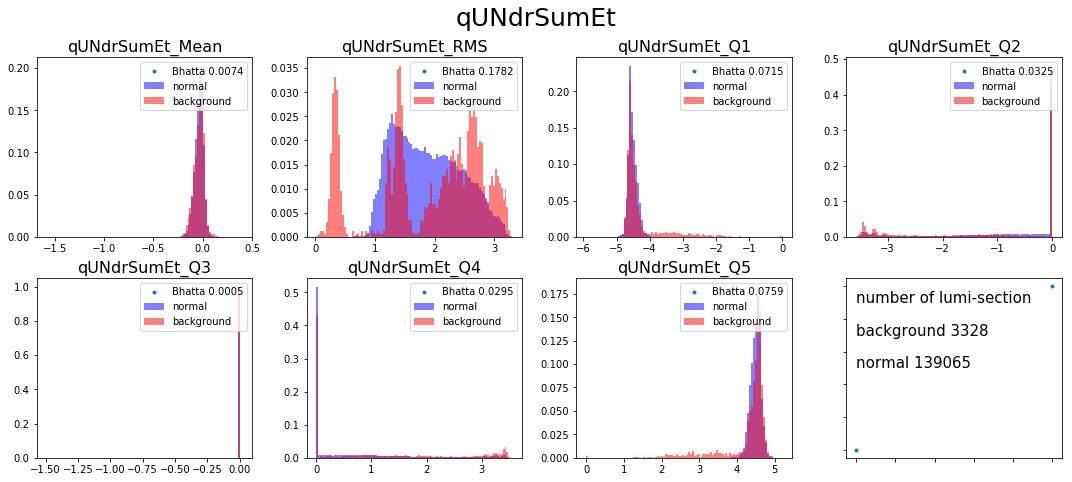

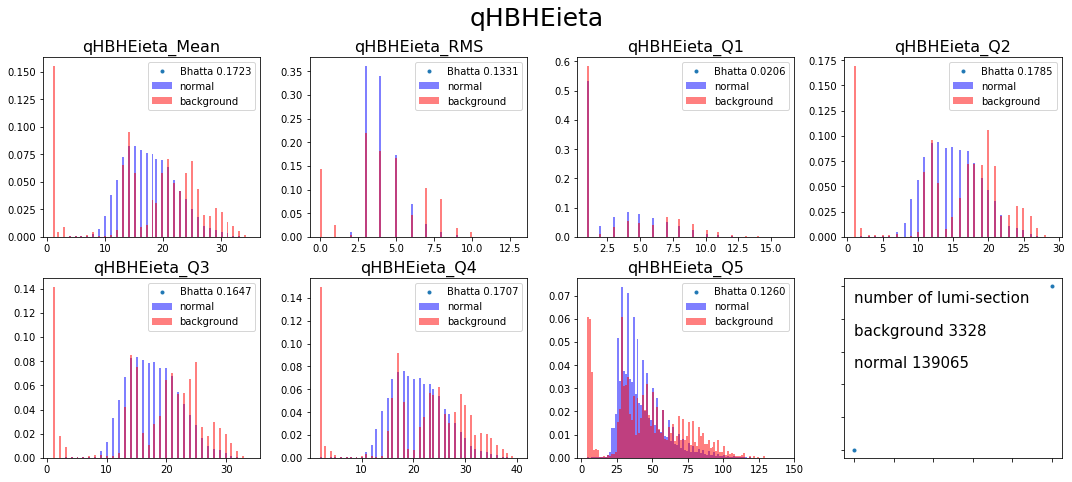

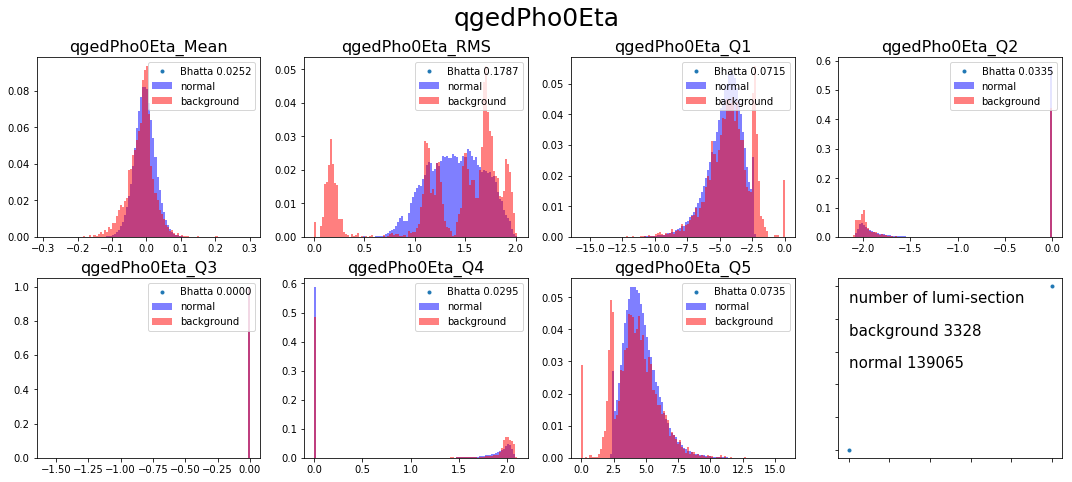

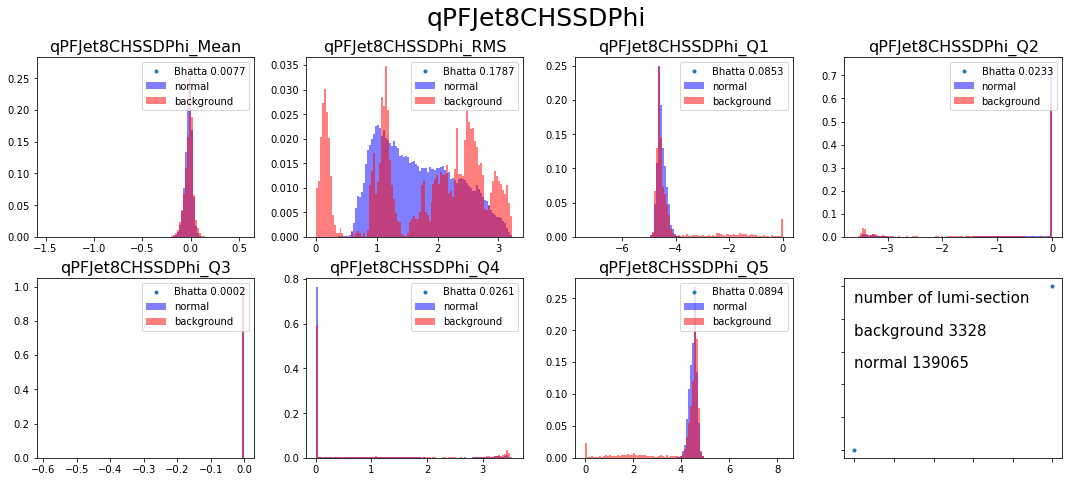

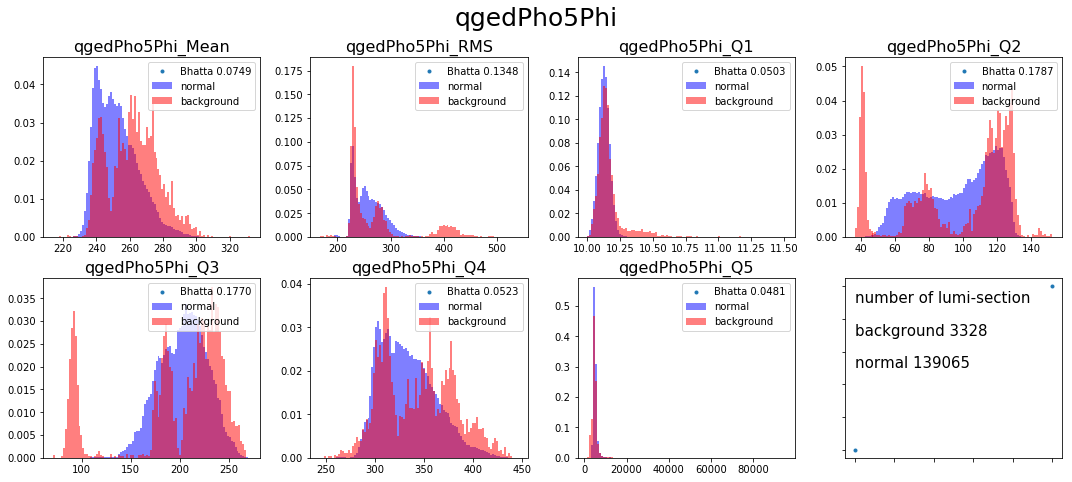

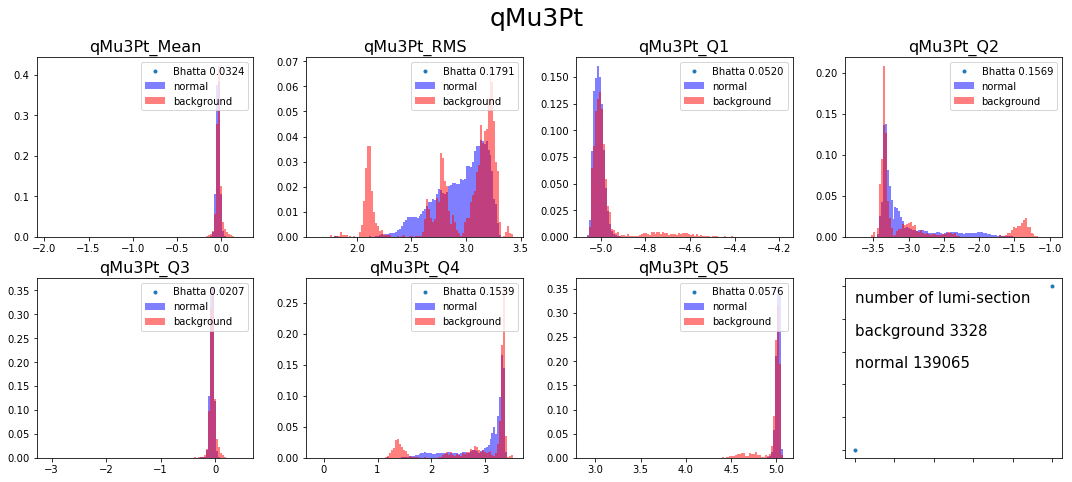

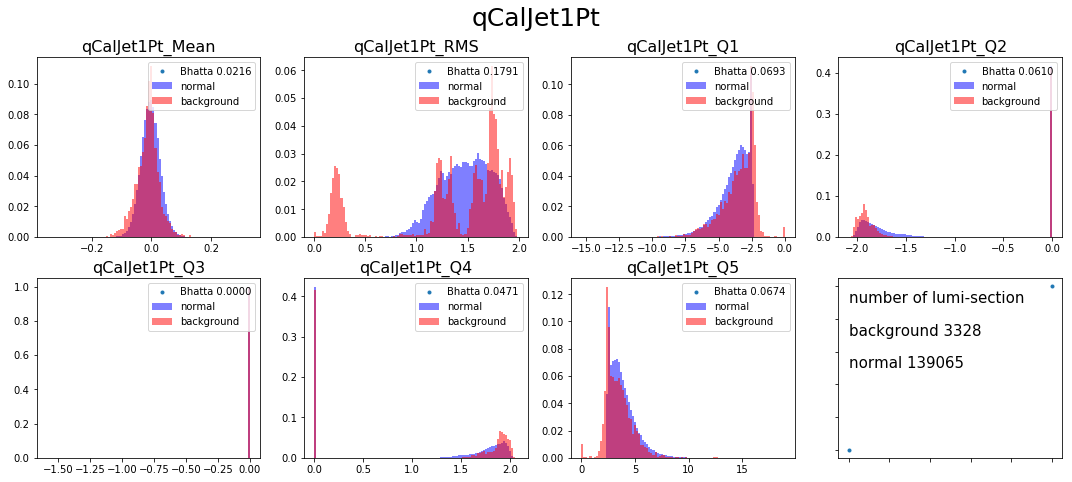

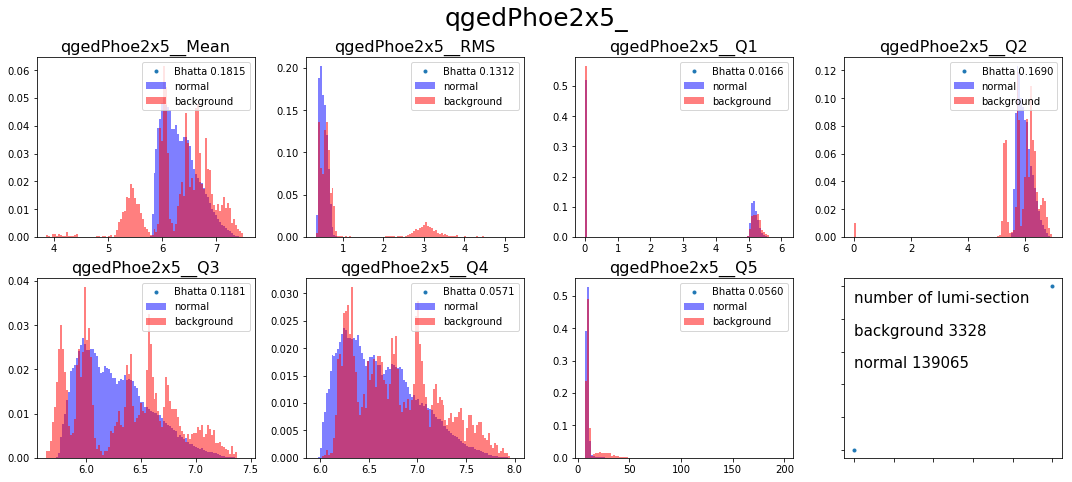

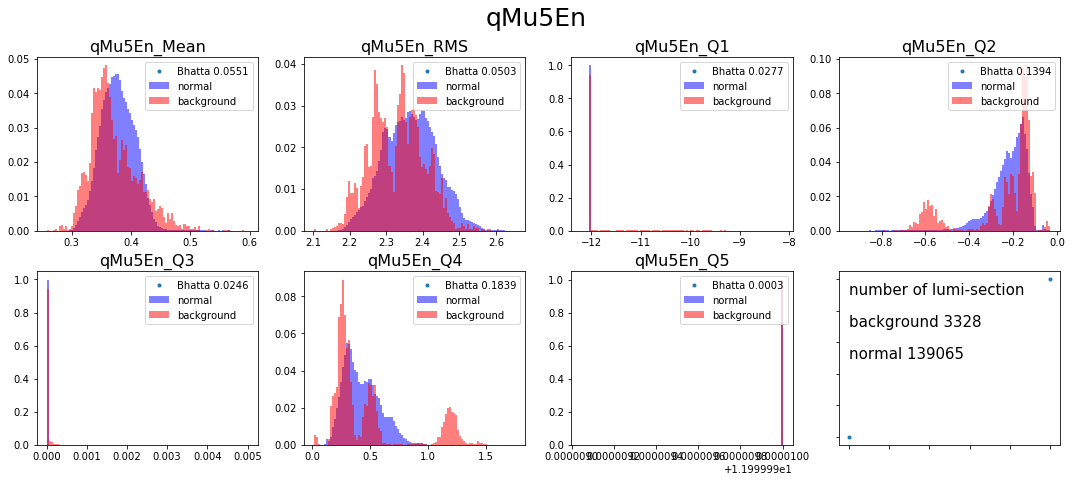

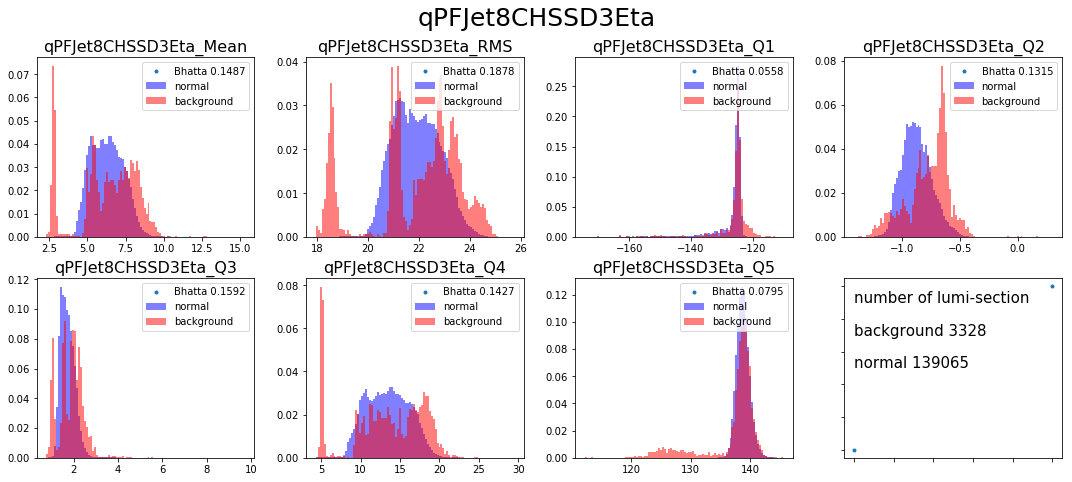

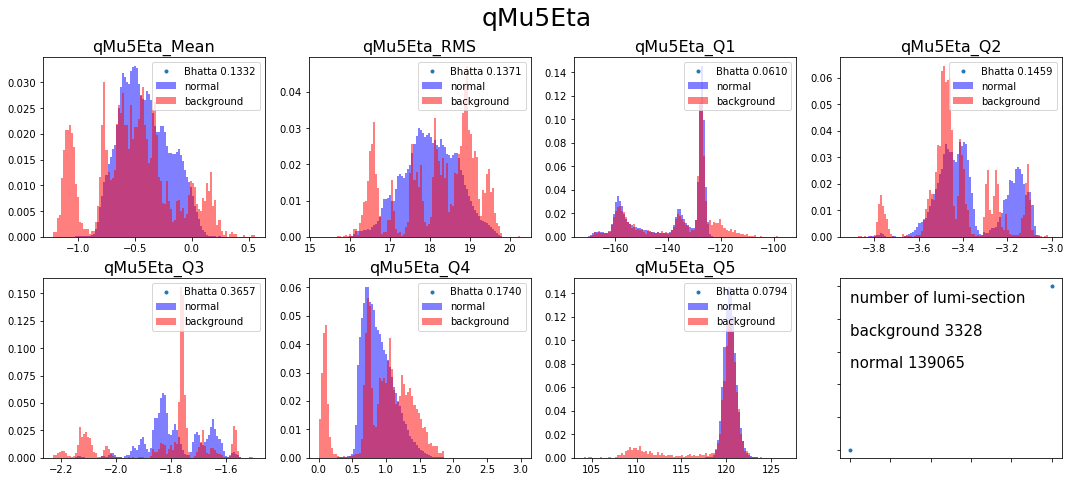

In [59]:
plot_variables(hist_sig, hist_back, bin_ranges, var_names_reduced5, var_range_to_plot=[260, 194, 340, 176, 368, 388, 165, 266, 176, 186, 112, 328, 206,
        84, 194])

qPFJet0Eta
qPFJetPhi
qPFJet4Pt
qPFJetEta
qPFJet2Pt
qPFJet3Pt
qPFJet5Pt
qPFJet4Eta
qPFJet3Phi
qPFJet5Phi
done plot_variables


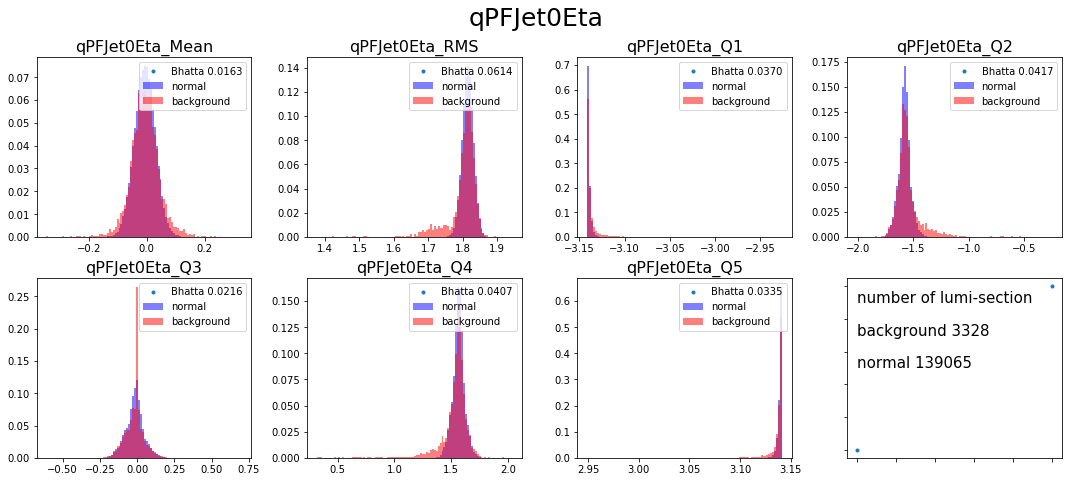

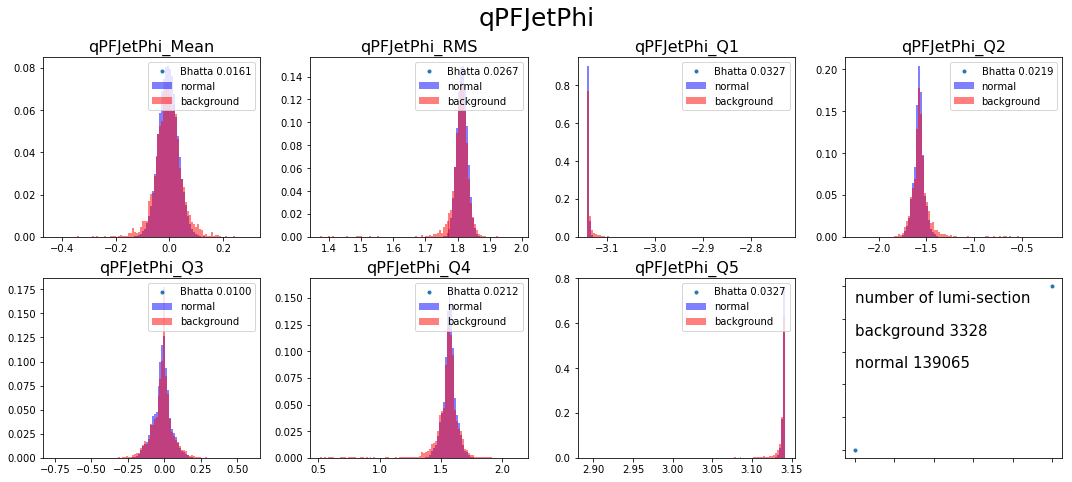

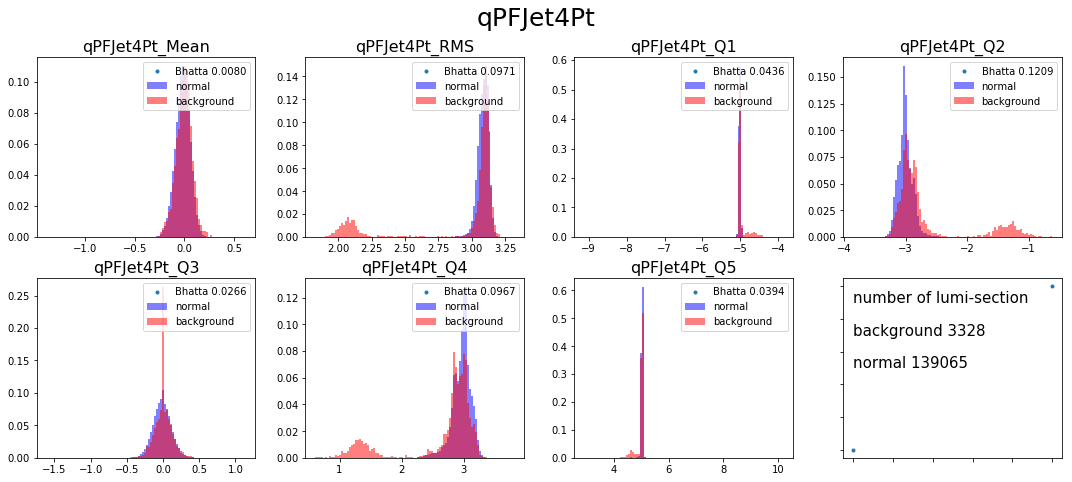

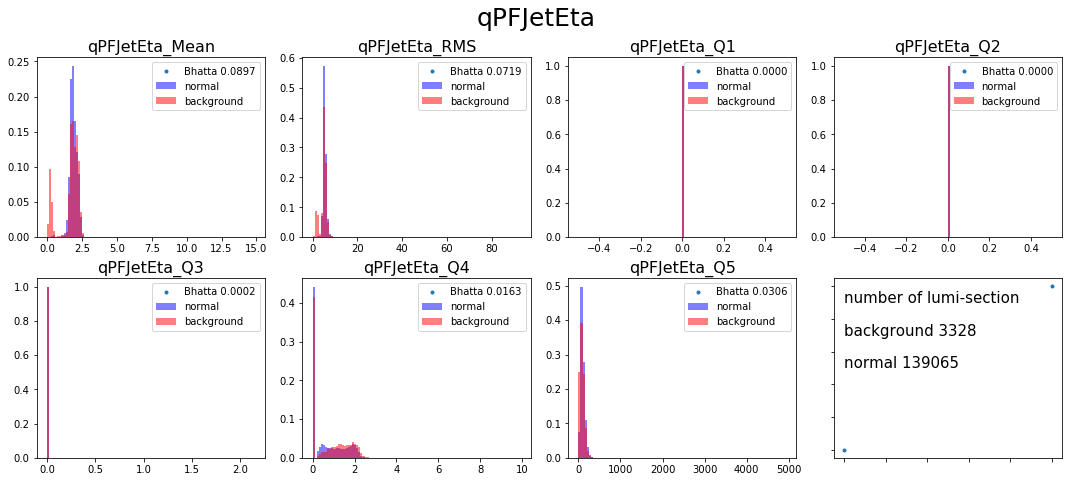

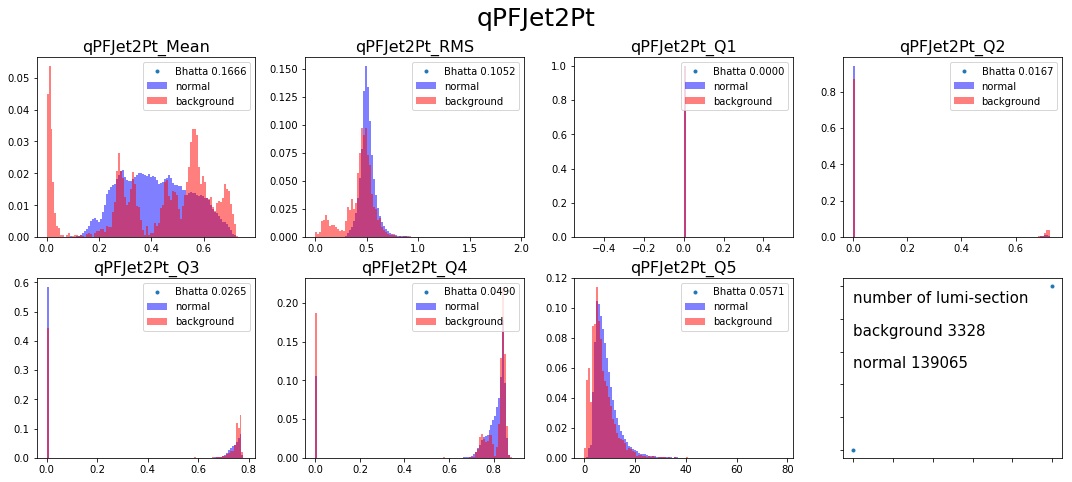

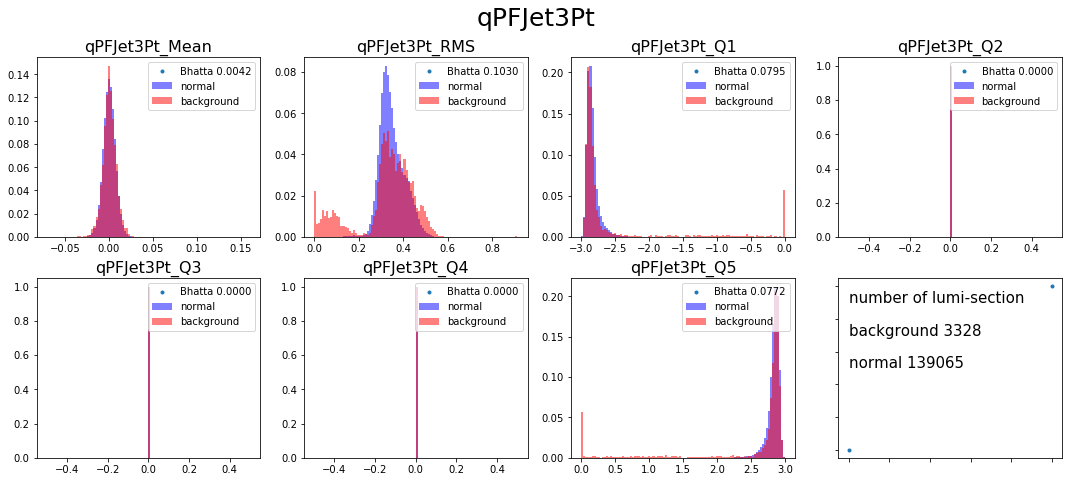

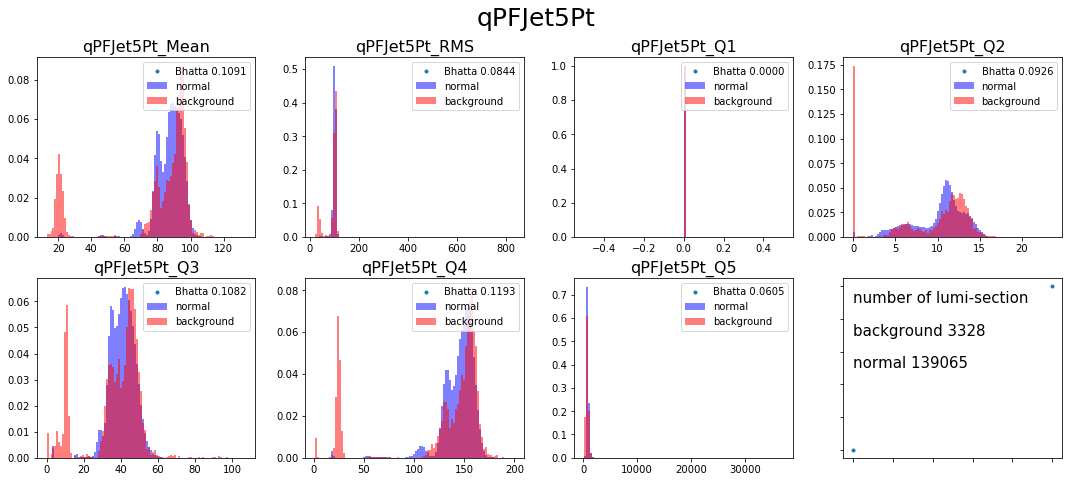

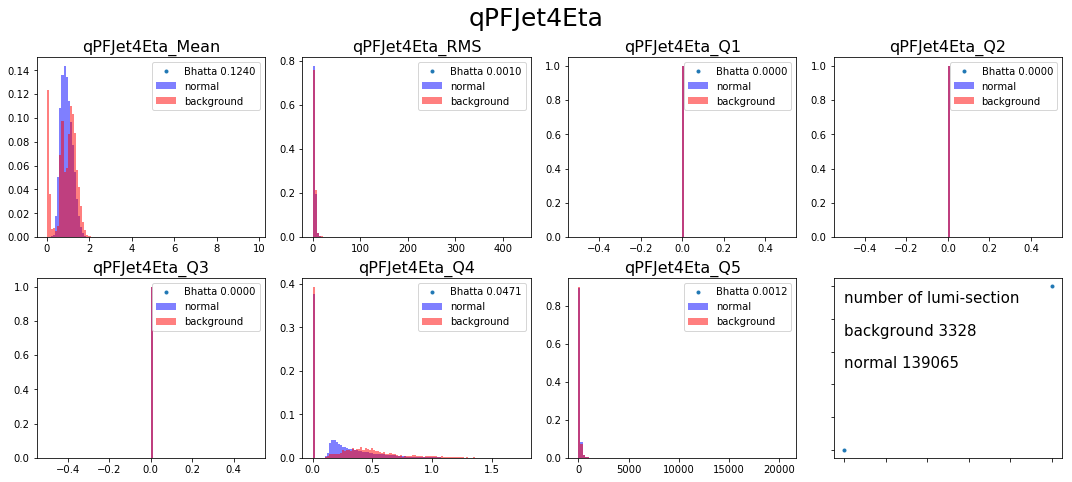

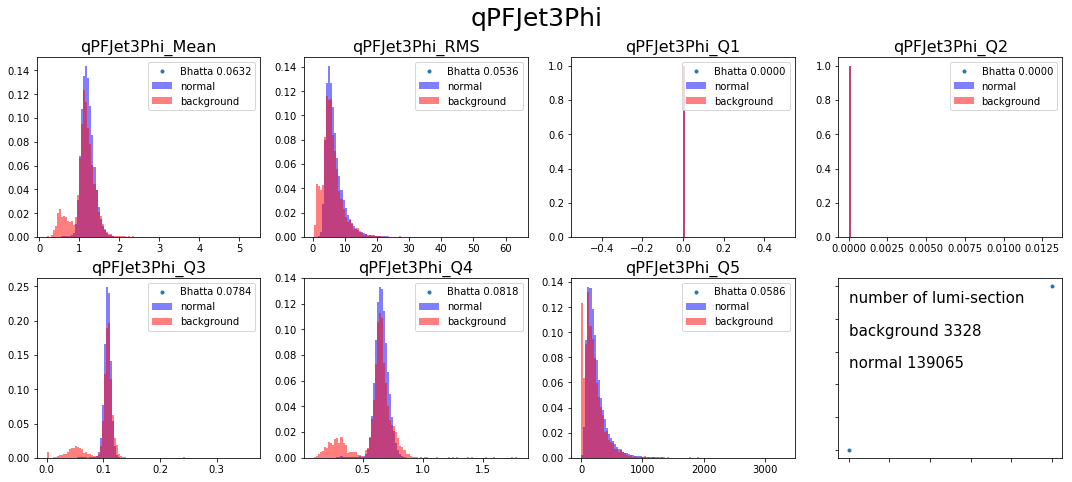

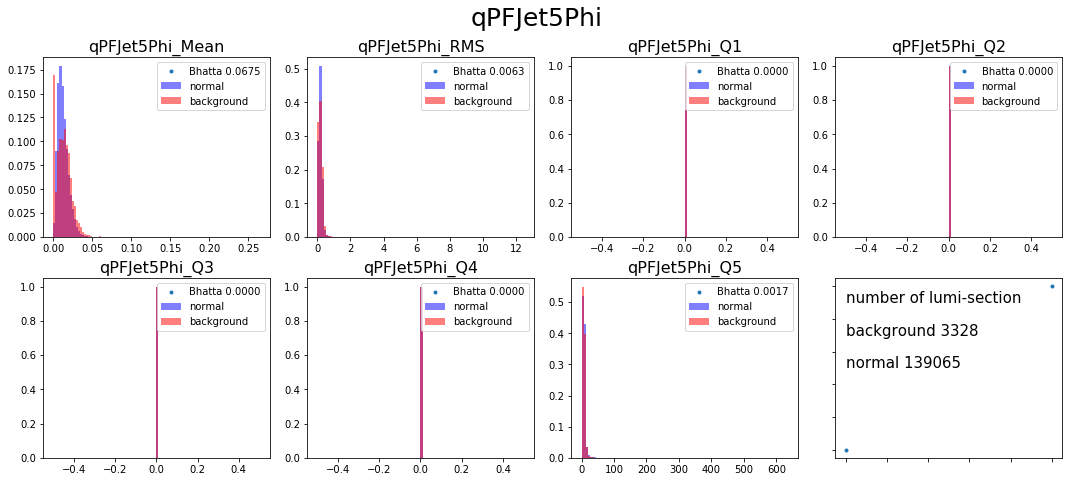

In [62]:
plot_variables(hist_sig, hist_back, bin_ranges, var_names_reduced5, var_range_to_plot=[9,2,7,1, 5, 6, 8, 13, 18, 20])

In [34]:
print(var_names_reduced5.index('qCalJet2Eta'))
print(var_names_reduced5.index('qPFJet0Eta'))

119
9


In [47]:
dists = []
for var_id in range(len(labels)): 
    bhat = bhattacharyya(hist_sig[:,var_id], hist_back[:,var_id])
    dists.append(bhat)
        
dists_sorted = sorted(zip(labels,dists), key=lambda tup: tup[1])
print(": ", dists_sorted)

:  [('qPFJetEta_Q1', 0.0), ('qPFJetEta_Q2', 0.0), ('qPFJet2Pt_Q1', 0.0), ('qPFJet3Pt_Q2', 0.0), ('qPFJet3Pt_Q3', 0.0), ('qPFJet3Pt_Q4', 0.0), ('qPFJet5Pt_Q1', 0.0), ('qPFJet4Eta_Q1', 0.0), ('qPFJet4Eta_Q2', 0.0), ('qPFJet4Eta_Q3', 0.0), ('qPFJet3Phi_Q1', 0.0), ('qPFJet5Phi_Q1', 0.0), ('qPFJet5Phi_Q2', 0.0), ('qPFJet5Phi_Q3', 0.0), ('qPFJet5Phi_Q4', 0.0), ('qPFJet4CHS3Pt_Q1', 0.0), ('qPFJet4CHS0Eta_Q1', 0.0), ('qPFJet4CHS0Eta_Q5', 0.0), ('qPFJet4CHS2Eta_Q1', 0.0), ('qPFJet4CHS3Eta_Q1', 0.0), ('qPFJet4CHS4Eta_Q2', 0.0), ('qPFJet4CHS4Eta_Q3', 0.0), ('qPFJet4CHS4Eta_Q4', 0.0), ('qPFJet4CHS3Phi_Q3', 0.0), ('qPFJet4CHS4Phi_Q4', 0.0), ('qPFJet8CHS0Pt_Q1', 0.0), ('qPFJet8CHS1Pt_Q2', 0.0), ('qPFJet8CHS1Pt_Q3', 0.0), ('qPFJet8CHS1Pt_Q4', 0.0), ('qPFJet8CHS4Pt_Q1', 0.0), ('qPFJet8CHS4Pt_Q2', 0.0), ('qPFJet8CHS4Pt_Q3', 0.0), ('qPFJet8CHS1Eta_Q3', 0.0), ('qPFJet8CHS5Eta_Q1', 0.0), ('qPFJet8CHS5Phi_Q1', 0.0), ('qPFJetEI0Pt_Q1', 0.0), ('qPFJetEI1Pt_Q1', 0.0), ('qPFJetEI3Pt_Q2', 0.0), ('qPFJetEI3Pt_Q3

In [48]:
print('worst (very similar dist): ', [e[0] for e in dists_sorted[0:15]])
print('best (distinguishing dist): ', [e[0] for e in dists_sorted[-15:]])

worst (very similar dist):  ['qPFJetEta_Q1', 'qPFJetEta_Q2', 'qPFJet2Pt_Q1', 'qPFJet3Pt_Q2', 'qPFJet3Pt_Q3', 'qPFJet3Pt_Q4', 'qPFJet5Pt_Q1', 'qPFJet4Eta_Q1', 'qPFJet4Eta_Q2', 'qPFJet4Eta_Q3', 'qPFJet3Phi_Q1', 'qPFJet5Phi_Q1', 'qPFJet5Phi_Q2', 'qPFJet5Phi_Q3', 'qPFJet5Phi_Q4']
best (distinguishing dist):  ['qPFJet8CHSPhi_Q2', 'qMu5Eta_Q4', 'qMuEn__RMS', 'qgedPho5Phi_Q3', 'qUNdrSumEt_RMS', 'qHBHEieta_Q2', 'qgedPho0Eta_RMS', 'qPFJet8CHSSDPhi_RMS', 'qgedPho5Phi_Q2', 'qMu3Pt_RMS', 'qCalJet1Pt_RMS', 'qgedPhoe2x5__Mean', 'qMu5En_Q4', 'qPFJet8CHSSD3Eta_RMS', 'qMu5Eta_Q3']


In [58]:
a = [labels.index(e[0]) for e in dists_sorted[-15:]]
print(np.array(a)/7)
(np.array(a)/7).astype('int')

[ 260.42857143  194.71428571  340.14285714  176.57142857  368.14285714
  388.42857143  165.14285714  266.14285714  176.42857143  186.14285714
  112.14285714  328.          206.71428571   84.14285714  194.57142857]


array([260, 194, 340, 176, 368, 388, 165, 266, 176, 186, 112, 328, 206,
        84, 194])

In [60]:
a = [labels.index(e[0]) for e in dists_sorted[0:15]]
print(np.array(a)/7)
(np.array(a)/7).astype('int')

[  1.28571429   1.42857143   5.28571429   6.42857143   6.57142857
   6.71428571   8.28571429  13.28571429  13.42857143  13.57142857
  18.28571429  20.28571429  20.42857143  20.57142857  20.71428571]


array([ 1,  1,  5,  6,  6,  6,  8, 13, 13, 13, 18, 20, 20, 20, 20])

[-1, 2805, 0, 0.25]

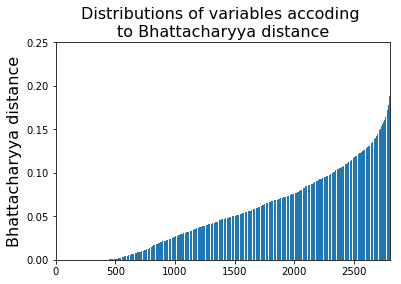

In [75]:
plt.bar(np.arange(len(dists)), sorted(dists))
plt.title('Distributions of variables accoding \nto Bhattacharyya distance', size=16)
plt.ylabel('Bhattacharyya distance', size=16)
# plt.xlabel('', size=16)
plt.axis([-1, 2805, 0, 0.25])